In [1]:
#Decision Tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [2]:
# Define all relevant features within an array
feature_selection = [
    "Switch ID", 
    "Port Number", 
    "Received Packets", 
    "Received Bytes", 
    "Sent Bytes", 
    "Sent Packets", 
    "Port alive Duration (S)", 
    "Delta Received Packets", 
    "Delta Received Bytes", 
    "Delta Sent Bytes", 
    "Delta Sent Packets", 
    "Delta Port alive Duration (S)", 
    "Connection Point", 
    "Total Load/Rate", 
    "Total Load/Latest", 
    "Unknown Load/Rate", 
    "Unknown Load/Latest", 
    "Latest bytes counter", 
    "Active Flow Entries", 
    "Packets Looked Up", 
    "Packets Matched"
]

In [3]:
#Import Cleaned UNR IDD Dataset with Network traffic
#Information about Data
#Label/Attacks are labeled with numbers: Blackhole = 1, Diversion: 2, "Normal": 3,"Overflow": 4, "PortScan": 5, "TCP-SYN": 6
#Binary Label is labeled: 1 = Attack, 2 = Normal
df = pd.read_csv("/Users/sinaronke/Predict Binary Label (Attack or Normal)/UNR_IDD_cleaned.csv")
df.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label,Binary Label
0,12,1,132,9181,6311853,238,46,0,0,280,...,0,0,0,0,0,9,767,688,6,1
1,12,2,187,6304498,15713,171,46,146,5908166,5969,...,0,0,0,0,0,9,767,688,6,1
2,12,3,235,6311567,8030,58,46,2,278,280,...,0,0,0,0,0,9,767,688,6,1
3,12,4,59,7878,16439,182,46,2,278,280,...,0,0,0,0,0,9,767,688,6,1
4,10,1,188,6304547,16497,183,46,0,0,280,...,0,0,0,0,0,7,489,403,6,1


In [4]:
#pending variable y with Label (only 1 pending variable possible)
#delete "Label" is necessary to predict Label as y target
df = df.drop("Binary Label", axis=1)

In [5]:
#Blackhole = 1, Diversion: 2, "Normal": 3,"Overflow": 4, "PortScan": 5, "TCP-SYN": 6
df["Label"].value_counts(dropna=False)

5    9498
6    8952
1    8397
2    5599
3    3723
4    1007
Name: Label, dtype: int64

In [6]:
#Define X for features to train the model and define y as target for predicition
X = df[feature_selection]
y = df["Label"]

In [7]:
#Split the data in training and test. Random state = 42 necessary for Comparability. Test Size 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None, random_state=42)

print('X_train:', X_train.shape, ' y_train:', y_train.shape)
print('X_test:', X_test.shape, ' y_test:', y_test.shape)

X_train: (27882, 21)  y_train: (27882,)
X_test: (9294, 21)  y_test: (9294,)


In [8]:
#Check if dataframe splitting is random for test and training data
df.groupby(y_train).count()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
Label,,,,,,,,,,,,,,,,,,,,,
1.0,6344,6344,6344,6344,6344,6344,6344,6344,6344,6344,...,6344,6344,6344,6344,6344,6344,6344,6344,6344,6344
2.0,4211,4211,4211,4211,4211,4211,4211,4211,4211,4211,...,4211,4211,4211,4211,4211,4211,4211,4211,4211,4211
3.0,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776,...,2776,2776,2776,2776,2776,2776,2776,2776,2776,2776
4.0,781,781,781,781,781,781,781,781,781,781,...,781,781,781,781,781,781,781,781,781,781
5.0,7109,7109,7109,7109,7109,7109,7109,7109,7109,7109,...,7109,7109,7109,7109,7109,7109,7109,7109,7109,7109
6.0,6661,6661,6661,6661,6661,6661,6661,6661,6661,6661,...,6661,6661,6661,6661,6661,6661,6661,6661,6661,6661


In [9]:
df.groupby(y_test).count()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
Label,,,,,,,,,,,,,,,,,,,,,
1.0,2053,2053,2053,2053,2053,2053,2053,2053,2053,2053,...,2053,2053,2053,2053,2053,2053,2053,2053,2053,2053
2.0,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388,...,1388,1388,1388,1388,1388,1388,1388,1388,1388,1388
3.0,947,947,947,947,947,947,947,947,947,947,...,947,947,947,947,947,947,947,947,947,947
4.0,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226
5.0,2389,2389,2389,2389,2389,2389,2389,2389,2389,2389,...,2389,2389,2389,2389,2389,2389,2389,2389,2389,2389
6.0,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291,...,2291,2291,2291,2291,2291,2291,2291,2291,2291,2291


In [10]:
#Decision Tree Classifier
#make_pipeline to make shure train and test data are seperated do not influence each other
#make_pipeline to make shure train and test data are scaled
#modify the max_depth, min_sample_leaf and more to avoid overfitting
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc_model1 = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=12, random_state=42, min_samples_leaf=5, max_leaf_nodes= 15))
dtc_model1.fit(X_train.values, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=12, max_leaf_nodes=15,
                                        min_samples_leaf=5, random_state=42))])

In [11]:
y_pred = dtc_model1.fit(X_train.values, y_train).predict(X_test.values)
y_true = y_test

In [12]:
#Show how many predictions are wrong 
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 9294 points : 1468


In [13]:
#Accuracy Score of predicted values if it is normal or attack
from sklearn.metrics import balanced_accuracy_score, accuracy_score
print("Accuracy Score: " + str(accuracy_score(y_test, y_pred)))
print("Balanced Accuracy Score: " + str(balanced_accuracy_score(y_test, y_pred)))

Accuracy Score: 0.8420486335270067
Balanced Accuracy Score: 0.7387446412562233


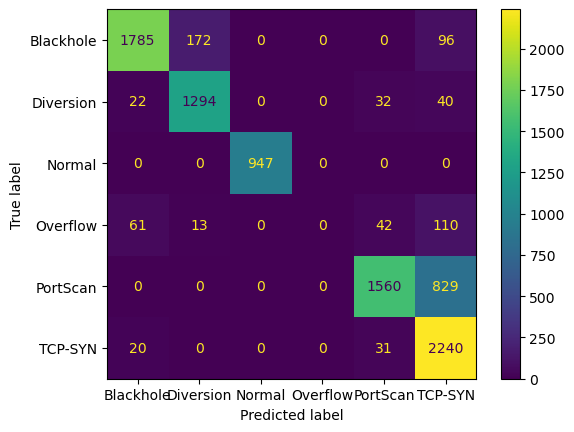

In [14]:
#Confusion Matrix shows 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Blackhole", "Diversion", "Normal", "Overflow", "PortScan", "TCP-SYN"])
cmd.plot()

In [15]:
#Precision score measure the average success of prediction (the number of true instances for each label)
from sklearn.metrics import precision_score
print("Precision Score: " +str(precision_score(y_true, y_pred, average="weighted", zero_division=0)))

Precision Score: 0.848804584610961


In [16]:
#Recall is euqal to Accuracy Score
from sklearn.metrics import recall_score
print("Recall Score: " +str(recall_score(y_true, y_pred, average="weighted", zero_division=0)))

Recall Score: 0.8420486335270067


In [17]:
#F1 Score interpreted as a harmonic mean of the precision and recall. Value between 0 (worst) and 1 (best)
print("F1 Score: " +str(f1_score(y_test, y_pred, average="weighted", zero_division=0)))

F1 Score: 0.8316224092260822


[Text(0.5, 0.9545454545454546, 'X[6] <= 0.082\ngini = 0.793\nsamples = 27882\nvalue = [6344, 4211, 2776, 781, 7109, 6661]'),
 Text(0.35714285714285715, 0.8636363636363636, 'X[19] <= 0.013\ngini = 0.566\nsamples = 14739\nvalue = [284, 246, 0, 516, 7109, 6584]'),
 Text(0.2857142857142857, 0.7727272727272727, 'X[6] <= 0.06\ngini = 0.544\nsamples = 10957\nvalue = [284, 246, 0, 516, 3343, 6568]'),
 Text(0.21428571428571427, 0.6818181818181818, 'X[20] <= 0.003\ngini = 0.495\nsamples = 9831\nvalue = [284, 151, 0, 384, 2510, 6502]'),
 Text(0.14285714285714285, 0.5909090909090909, 'X[14] <= 0.0\ngini = 0.582\nsamples = 7016\nvalue = [284, 151, 0, 343, 2457, 3781]'),
 Text(0.07142857142857142, 0.5, 'gini = 0.601\nsamples = 5730\nvalue = [260, 134, 0, 256, 2375, 2705]'),
 Text(0.21428571428571427, 0.5, 'gini = 0.291\nsamples = 1286\nvalue = [24, 17, 0, 87, 82, 1076]'),
 Text(0.2857142857142857, 0.5909090909090909, 'gini = 0.065\nsamples = 2815\nvalue = [0, 0, 0, 41, 53, 2721]'),
 Text(0.357142857

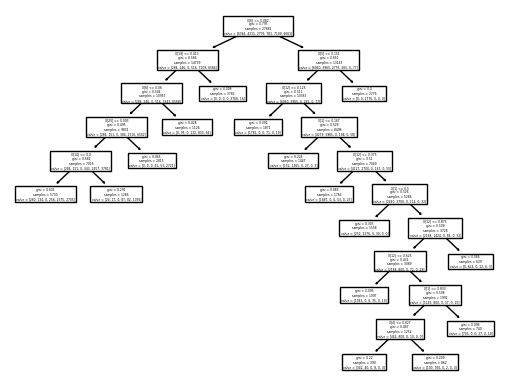

In [18]:
plot_tree(dtc_model1["decisiontreeclassifier"])
